In [1]:
import face_recognition as fr
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random

## 1. Get coordinates of face with face_recognition

In [2]:
test_image = fr.load_image_file("./datasets/test_faces/image_0001.jpg")
test_image2 = fr.load_image_file("./datasets/test_faces/image_0002.jpg")
face_locations = fr.face_locations(test_image)
print(face_locations)

[(206, 776, 527, 455)]


### 1.1 Functions getting coordinates of face and create rectangle
HINT: Make sure only image files are located in the folder

In [3]:
# Function 01:
#   creates coordinates of face location
def get_face_cords_of_image(path_to_image):
    image = fr.load_image_file(path_to_image)
    return image, fr.face_locations(image)

# Function 02:
#   create rectangle on faces with given coordinates
def create_rectangle_on_image(image, cords):
    image_rectangle = []
    for coordinate in cords:
        image_rectangle = cv2.rectangle(image, (coordinate[2],coordinate[0]), 
                                                (coordinate[1],coordinate[3]), (255,0,0), 5)
    return image_rectangle

# Function 03:
#   Combination of functions above
def locate_face_of_image(path_to_image):
    image, cords = get_face_cords_of_image(path_to_image)
    image_output = create_rectangle_on_image(image, cords)
    return image_output

### 1.2 Testing Function 03 on image

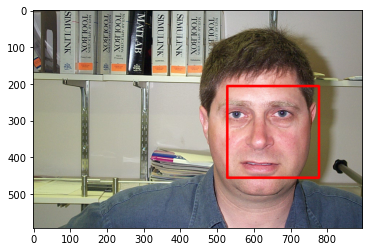

In [4]:
plt.imshow(locate_face_of_image("./datasets/test_faces/image_0001.jpg"))

# 2. Identify faces in pictures

## 2.1 Testing encoding and comparing of images

<Figure size 432x288 with 0 Axes>

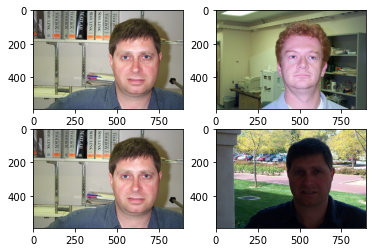

[[False], [True]]


In [5]:
pic_subj_one = fr.load_image_file("./datasets/test_faces/image_0001.jpg")
unknown_image_one = fr.load_image_file("./datasets/test_faces/image_0030.jpg")
unknown_image_two = fr.load_image_file("./datasets/test_faces/image_0015.jpg")

encoding_subj_one = fr.face_encodings(pic_subj_one)[0]
unknown_encoding_one = fr.face_encodings(unknown_image_one)[0]
unknown_encoding_two = fr.face_encodings(unknown_image_two)[0]

results = []
results.append(fr.compare_faces([encoding_subj_one], unknown_encoding_one))
results.append(fr.compare_faces([encoding_subj_one], unknown_encoding_two))

plt.figure()
f, ax = plt.subplots(2,2)
ax[0, 0].imshow(pic_subj_one)
ax[0, 1].imshow(unknown_image_one)
ax[1, 0].imshow(pic_subj_one)
ax[1, 1].imshow(unknown_image_two)
plt.show()

print (results)

## 2.2 Functions to test on multiple images

In [6]:
# Function 04:
#   reads all images of a folder which end with ".jpg"
def read_imageList(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".jpg"):
            img = fr.load_image_file(os.path.join(folder_path, filename))
            if img is not None:
                images.append(img)
    return images

# Function 05:
#   imageList must contain images read in with face_recognition.load_image_file()
#   face_recognition.face_encodings() can return multiple encdodings if there are 
#   located multiple faces in an image.
def encode_imageList(imageList):
    encodings = []
    for image in imageList:
        encodings.append(fr.face_encodings(image))
    return encodings

# Function 06:
#   compares test encodings with known encodings
#   @result: an array where each entry is a list of known image compared to all unknown images.
def recognize_faces(unknown_encodings, known_encodings, face_names):
    result = []
    for i in range(len(known_encodings)):
        recognized = []
        for j in range(len(unknown_encodings)):
            if unknown_encodings[j]:
                recognized.append(fr.compare_faces([known_encodings[i][0]], unknown_encodings[j][0])[0])
            else:
                recognized.append(False)
        result.append(recognized)
    return result

# Function 07:
#   get x random images from dataset
def get_random_images(x, dataset):
    output = []
    for i in range(x):
        output.append(dataset[random.randint(0, len(dataset))])
    return output

# Function 08:
#   creates face names if no names are specified
def create_face_names(num_faces):
    face_names = []
    for i in range(num_faces):
        face_names.append("Face %02d" % i)
    return face_names

# Function 09:
#   create subplot of size i, j
#   @i: the length of known faces array
#   @j: the length of test faces array
def plot_result(known_faces, unknown_faces, result):
    for i in known_faces:
        for j in unknown_faces:
            plt.figure()
            f, (ax1, ax2) = plt.subplots(1, 2)
            ax1.imshow(i)
            ax2.imshow(j)
            plt.show()

## 2.3 Testing implemented functions

### 2.3.1 Assigning variables

In [7]:
# @ faces: dataset to apply face_recognition on
# @known_faces: dataset with faces we want to recognize in dataset faces
# @known_faces_ranges: the images are stored in ordered structure in faces and known_faces. 
#                      Each index indicates the range where the same person is located.
# @known_names: feature if you want to add a persons name (not implemented here)

faces = read_imageList("./datasets/test_faces")

known_faces = [
    fr.load_image_file("./datasets/test_faces/image_0001.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0022.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0042.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0047.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0069.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0090.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0113.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0133.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0159.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0166.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0171.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0176.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0196.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0217.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0242.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0264.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0269.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0288.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0308.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0337.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0357.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0377.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0399.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0400.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0401.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0402.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0403.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0404.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0409.jpg"),
    fr.load_image_file("./datasets/test_faces/image_0429.jpg")
]
 
known_faces_ranges = [[0, 20], [21, 40], [41, 45], [46, 67], [68, 88], 
                      [89, 111], [112, 131], [132, 157], [158, 164], [165, 169], 
                      [170, 174], [175, 194], [195, 215], [216, 240], [241, 262], 
                      [263, 267], [268, 286], [287, 306], [307, 335], [336, 355], 
                      [356, 375], [376, 397], [398, 398], [399, 399], [400, 400], 
                      [401, 401], [402, 402], [403, 407], [408, 427], [428, 449]]

known_names = create_face_names(len(known_faces))

### 2.3.2 Using the functions to detect faces with random encodings

In [8]:
test_known_faces = get_random_images(3, known_faces)
test_faces = get_random_images(10, faces)

known_encodings = encode_imageList(test_known_faces)
test_encodings = encode_imageList(test_faces)

In [9]:
result = recognize_faces(test_encodings, known_encodings, known_names)

In [10]:
print (result)

[[False, False, False, False, False, False, False, False, False, False], [True, False, False, False, False, False, False, False, False, False], [True, False, False, False, False, False, False, False, False, False]]


<Figure size 432x288 with 0 Axes>

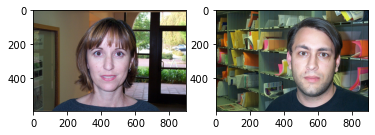

<Figure size 432x288 with 0 Axes>

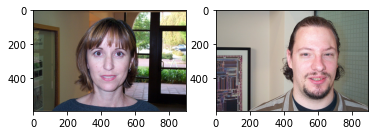

<Figure size 432x288 with 0 Axes>

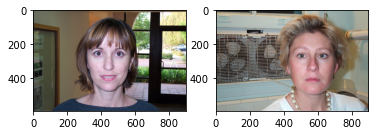

<Figure size 432x288 with 0 Axes>

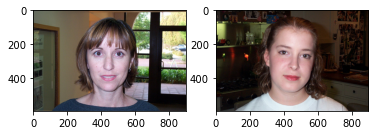

<Figure size 432x288 with 0 Axes>

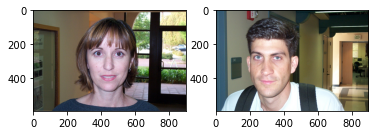

<Figure size 432x288 with 0 Axes>

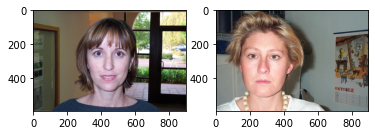

<Figure size 432x288 with 0 Axes>

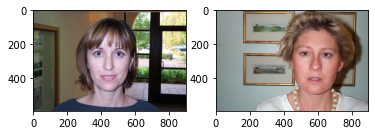

<Figure size 432x288 with 0 Axes>

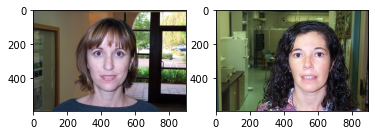

<Figure size 432x288 with 0 Axes>

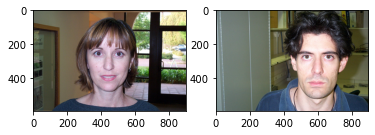

<Figure size 432x288 with 0 Axes>

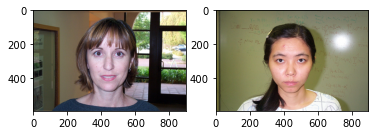

<Figure size 432x288 with 0 Axes>

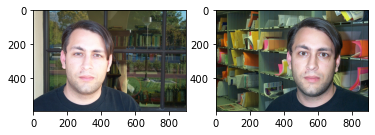

<Figure size 432x288 with 0 Axes>

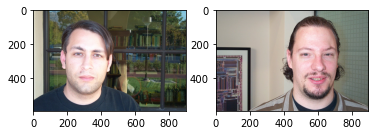

<Figure size 432x288 with 0 Axes>

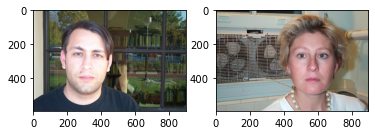

<Figure size 432x288 with 0 Axes>

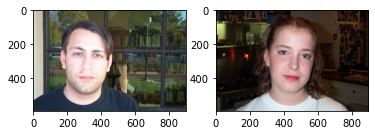

<Figure size 432x288 with 0 Axes>

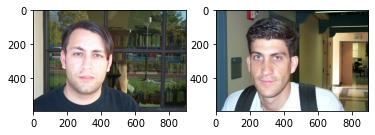

<Figure size 432x288 with 0 Axes>

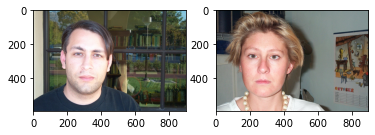

<Figure size 432x288 with 0 Axes>

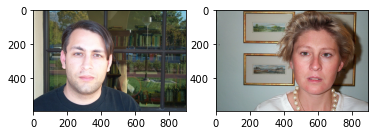

<Figure size 432x288 with 0 Axes>

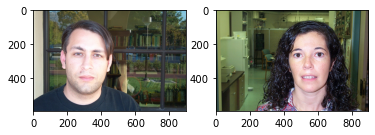

<Figure size 432x288 with 0 Axes>

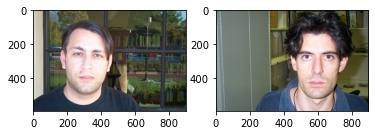

<Figure size 432x288 with 0 Axes>

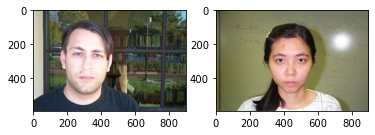

<Figure size 432x288 with 0 Axes>

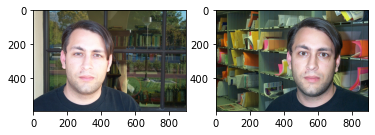

<Figure size 432x288 with 0 Axes>

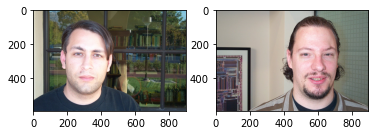

<Figure size 432x288 with 0 Axes>

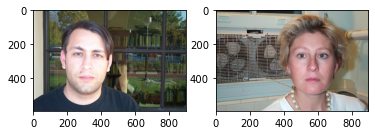

<Figure size 432x288 with 0 Axes>

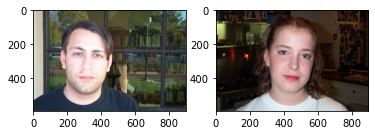

<Figure size 432x288 with 0 Axes>

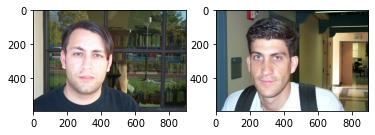

<Figure size 432x288 with 0 Axes>

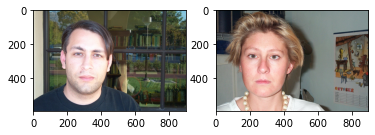

<Figure size 432x288 with 0 Axes>

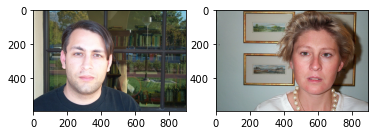

<Figure size 432x288 with 0 Axes>

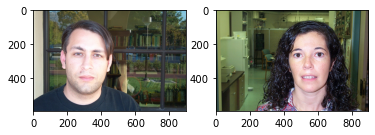

<Figure size 432x288 with 0 Axes>

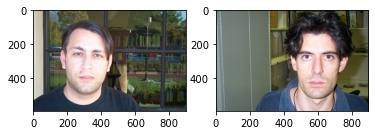

<Figure size 432x288 with 0 Axes>

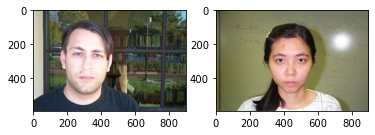

In [11]:
plot_result(test_known_faces, test_faces, result)

# 3. Creating False-Acceptance-Ratio, False-Rejection-Ratio (FAR, FRR)

## 3.1 Functions

In [12]:
# Function 10:
#   compares results of face recognition with reality
#   counts the true/false values in specified range of known_faces_ranges (see 2.3.1)
#   @idx: idex of person of known_faces
def test_person_i(idx, result, faces_ranges):
    count_ta = 0 # true accept
    count_tr = 0 # true reject
    count_fa = 0 # false accept
    count_fr = 0 # false reject
    for i in range (len(result[idx])):
        if faces_ranges[idx][0] <= i <= faces_ranges[idx][1]:
            if (result[idx][i]):
            #print(result[0][i])
                count_ta += 1
            else:
                count_fr += 1
        else:
            if (not result[idx][i]):
                count_tr += 1
            else:
                count_fa += 1
    return [count_ta, count_tr, count_fa, count_fr]
    print ("Testing Person with Index " + str(idx) + ":\n"
           + "count_ta: " + str(count_ta) + "\n" 
           + "count_tr: " + str(count_tr) + "\n"
           + "count_fa: " + str(count_fa) + "\n"
           + "count_fr: " + str(count_fr))

# Function 11: 
#   Quantifies function 10
#   seperated with function 10 to use it for testing
def get_ratio(result, faces_ranges):
    ttl_cnt_ta = 0
    ttl_cnt_tr = 0
    ttl_cnt_fa = 0
    ttl_cnt_fr = 0
    for i in range (len(result)):
        cnts = test_person_i (i, result, faces_ranges)
        ttl_cnt_ta += cnts[0]
        ttl_cnt_tr += cnts[1]
        ttl_cnt_fa += cnts[2]
        ttl_cnt_fr += cnts[3]
    return [[ttl_cnt_ta, ttl_cnt_tr], [ttl_cnt_fa, ttl_cnt_fr]]

# Function 12:
#   prints ratio created with Function 11
def print_ratio(ratio):
    print ("--------------------------------------\n"
           + "FAR: " + "%.4f" % (ratio[1][0]/ratio[0][0]) + "\n"
           + "FRR: " + "%.4f" % (ratio[1][1]/ratio[0][0]) + "\n"
           + "true accept:  " + str(ratio[0][0]) + "\n" 
           + "true reject:  " + str(ratio[0][1]) + "\n"
           + "false accept: " + str(ratio[1][0]) + "\n"
           + "false reject: " + str(ratio[1][1]))

## 3.2 Testing functions

In [13]:
test_encodings = encode_imageList(faces)             # @faces: see 2.3
test_known_encodings = encode_imageList(known_faces) # @known_faces: see 2.3

In [14]:
test_result = recognize_faces(test_encodings, test_known_encodings, known_names)

In [15]:
test_ratio = get_ratio(test_result, known_faces_ranges)

In [16]:
print_ratio(test_ratio)

--------------------------------------
FAR: 0.2800
FRR: 0.0588
TOTAL tested people: 3
true accept:  425
true reject:  12931
false accept: 119
false reject: 25
